In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd

In [19]:
# load TikTokScraper classes
%run "/content/drive/MyDrive/NetworkScience_Project/Tiktok/tiktok_interface.ipynb"

# initialize sender class:
tt = Tiktok_I_ED(token_ED_API="4tenBL1ekkMyRRiH")

In [20]:
# Creating Tiktok posts reading function

def read_tiktok(tt, hashtag_name, total_posts_to_retrieve, cursor=0):

    retrieved_posts = 0
    all_posts = []

    # read tiktok in batches
    while cursor < total_posts_to_retrieve:
        res, success =  tt.get_hashtag_posts(name=hashtag_name, cursor=cursor)
        if not success: break
        if 'data' in res.keys():
          all_posts.extend(res['data'])
        else:
          break
        if 'nextCursor' in res.keys():
          cursor = res['nextCursor']
          print(cursor)
        else:
          break

    df = pd.json_normalize(all_posts)
    print('a total of ' + str(len(df)) + ' posts have been collected out of '
                        + str(total_posts_to_retrieve))
    return df

In [21]:
# seting maximum post search criteria
total_posts_to_retrieve = 1000
hashtag = ["feminism"]

# reading post from tiktok
df = read_tiktok(tt, hashtag, total_posts_to_retrieve)

20
40
60
80
100
120
140
160
180
200
220
240
260
280
300
320
340
360
380
400
420
440
460
480
500
520
540
560
580
600
620
640
660
680
700
720
740
760
780
800
820
840
860
880
900
920
940
960
980
1000
a total of 699 posts have been collected out of 1000


In [28]:
# Checking all the entries
for u in df.columns: print(u)

# selecting useful entries
final_df = df[['aweme_id','create_time',
               'desc','share_url','video.download_addr.url_list',
               'author_user_id','author.nickname',
               'statistics.comment_count','statistics.play_count',
               'statistics.share_count']]

# converting timestamp to a readable format
import datetime
final_df["create_time"] = [datetime.date.fromtimestamp(i) for i in final_df["create_time"]]

# storing to csv form
final_df.to_csv('/content/drive/MyDrive/NetworkScience_Project/Tiktok/tiktok_feminism_videos.csv', index=True)

# showing data
display(final_df)

anchors
author_user_id
aweme_id
aweme_type
banners
behind_the_song_music_ids
behind_the_song_video_music_ids
bodydance_score
branded_content_accounts
cha_list
challenge_position
cmt_swt
collect_stat
comment_topbar_info
commerce_config_data
content_desc
content_desc_extra
content_original_type
content_size_type
content_type
cover_labels
create_time
desc
desc_language
disable_search_trending_bar
distance
distribute_type
duration
follow_up_publish_from_id
geofencing
geofencing_regions
green_screen_materials
group_id
has_danmaku
has_vs_entry
have_dashboard
hybrid_label
image_infos
interaction_stickers
is_ads
is_description_translatable
is_hash_tag
is_nff_or_nr
is_on_this_day
is_pgcshow
is_preview
is_relieve
is_story
is_text_sticker_translatable
is_title_translatable
is_top
is_vr
item_comment_settings
item_duet
item_react
item_stitch
label_top_text
long_video
main_arch_common
mask_infos
misc_info
muf_comment_info_v2
music_begin_time_in_ms
music_end_time_in_ms
music_selected_from
music_title

<ipython-input-28-6dfe4fc03027>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_df["create_time"] = [datetime.date.fromtimestamp(i) for i in final_df["create_time"]]


,aweme_id,create_time,desc,share_url,video.download_addr.url_list,author_user_id,author.nickname,statistics.comment_count,statistics.play_count,statistics.share_count
0,7320772019082104107,2024-01-06,the conversation im 99% sure id have with that...,https://m.tiktok.com/v/7320772019082104107.htm...,[https://v19-us.tiktokcdn.com/1501d94a1e2c4a2f...,6815328278494151685,Leah,3561,3089378,3142
1,7260541374045506842,2023-07-27,we have a long way to go until we finally get ...,https://m.tiktok.com/v/7260541374045506842.htm...,[https://v19-us.tiktokcdn.com/b0c6e47657fde496...,6958213340830450694,re :),866,3058856,18993
2,7275168470763867434,2023-09-05,This discourse literally broke my brain #femin...,https://m.tiktok.com/v/7275168470763867434.htm...,[https://v19-us.tiktokcdn.com/8c29d8a7c1851b28...,6755281676442108933,Keara Sullivan,1791,571914,1383
3,7252367613081177387,2023-07-05,Korean radical Feminism is on another level #k...,https://m.tiktok.com/v/7252367613081177387.htm...,[https://v19-us.tiktokcdn.com/be785b765c0a3f87...,6814101369282348037,Bryan Jun,609,74214,72
4,7272392809842265376,2023-08-28,anyone want to see a pt 2?? #feminism #feminis...,https://m.tiktok.com/v/7272392809842265376.htm...,[https://v19-us.tiktokcdn.com/2e4963ca57de2972...,7256820443343373339,leah,2590,2189971,1451
...,...,...,...,...,...,...,...,...,...,...
694,7259941197173509418,2023-07-26,he thought he did sum tho #barbie #BarbieMovie...,https://m.tiktok.com/v/7259941197173509418.htm...,[https://v39-us.tiktokcdn.com/c4fa2d98f3559363...,6655409814405709829,Saraahhh,2204,2754410,14356
695,7133287369511292162,2022-08-18,Mf wants the wifi password #meme #spooky #ohio...,https://m.tiktok.com/v/7133287369511292162.htm...,[https://v39-us.tiktokcdn.com/a00ac5528206c85e...,6766581916076721157,✰ Kairi✰,5447,2853537,8254
696,7097266804770262278,2022-05-13,it’s not all men but it’s enough! #womensright...,https://m.tiktok.com/v/7097266804770262278.htm...,[https://v39-us.tiktokcdn.com/d2521edbf8d2d5c7...,6589568636070592517,mads🎀,5124,1704794,3197
697,6950807612459961605,2021-04-14,Fellas... is it gay for women to find you attr...,https://m.tiktok.com/v/6950807612459961605.htm...,[https://v39-us.tiktokcdn.com/6da67f803aa27a53...,6754117363396068357,Victoria Gravesande,6106,1444337,13616


In [29]:
# Creating function to extract the tiktok comments from tiktok posts

def tiktok_comments(tt, aweme_id, total_comments_to_retrieve, cursor=0):

    retrieved_comments = 0
    all_comments = []
    isempty = True

    # read tiktok in batches
    while cursor < total_comments_to_retrieve:
        res, success =  tt.get_post_comments(aweme_id, cursor=cursor)
        if (not success)|(not res): break
        if 'comments' in res.keys():
          all_comments.extend(res['comments'])
          isempty = False
        else:
          break
        if 'nextCursor' in res.keys():
          cursor = res['nextCursor']
          print(cursor)
        else:
          break

    df = pd.json_normalize(all_comments)
    print('a total of ' + str(len(df)) + ' comments have been collected out of '
                        + str(total_comments_to_retrieve))
    return df, isempty

In [31]:
# setting search criteria for comments per each posts
total_comments_to_retrieve = 30

# reading data from tiktok
isempty = True
for i in range(len(final_df)):
  # changing account
  if (i==45):
    tt = Tiktok_I_ED(token_ED_API="XWfVK15nTRBaSp4x")
  # getting comments
  if (final_df["statistics.comment_count"][i]>10):
    aweme_id = final_df["aweme_id"][i]
    df_tmp, isempty_tmp = tiktok_comments(tt,aweme_id,total_comments_to_retrieve)
    if (isempty_tmp == False):
      if (isempty == True):
        df1 = df_tmp
        isempty = False
      else:
        df1 = pd.concat([df1,df_tmp])

a total of 0 comments have been collected out of 30
a total of 0 comments have been collected out of 30
a total of 0 comments have been collected out of 30
a total of 0 comments have been collected out of 30
a total of 0 comments have been collected out of 30
a total of 0 comments have been collected out of 30
a total of 0 comments have been collected out of 30
a total of 0 comments have been collected out of 30
a total of 0 comments have been collected out of 30
a total of 0 comments have been collected out of 30
a total of 0 comments have been collected out of 30
a total of 0 comments have been collected out of 30
a total of 0 comments have been collected out of 30
a total of 0 comments have been collected out of 30
a total of 0 comments have been collected out of 30
a total of 0 comments have been collected out of 30
a total of 0 comments have been collected out of 30
a total of 0 comments have been collected out of 30
a total of 0 comments have been collected out of 30
a total of 0

In [32]:
df1.head()

,author_pin,aweme_id,cid,collect_stat,comment_language,comment_post_item_ids,create_time,digg_count,image_list,is_author_digged,...,user.room_id,user.tw_expire_time,user.twitter_id,user.twitter_name,user.youtube_channel_id,user.youtube_channel_title,user.youtube_expire_time,label_text,label_type,user.special_account.tt_now.tt_now_log_status
0,False,7320282932583796014,7320696800301237023,0,en,None,1704482577,577,None,True,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,False,7320282932583796014,7320722657702822686,0,en,None,1704488588,987,None,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,False,7320282932583796014,7321407156689912606,0,en,None,1704647958,236,None,False,...,0.0,0.0,,,,,0.0,NaN,NaN,NaN
3,False,7320282932583796014,7320913384194081569,0,en,None,1704533012,510,None,False,...,0.0,0.0,,,,,0.0,NaN,NaN,NaN
4,False,7320282932583796014,7320695146223174443,0,en,None,1704482194,607,None,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [33]:
# see all entries
for u in df1.columns: print(u)

# select useful entries
final_df1 = df1[['aweme_id','cid','create_time',
                 'user.uid','user.nickname',
                 'text','reply_comment_total']]

# convert timestamp to a readable format
final_df1["create_time"] = [datetime.date.fromtimestamp(i) for i in final_df1["create_time"]]
# rename indexes
df1.index=range(len(df1))

# store to csv form
final_df1.to_csv('/content/drive/MyDrive/NetworkScience_Project/Tiktok/tiktok_feminism_replies.csv', index=True)

# show data
display(final_df1)

author_pin
aweme_id
cid
collect_stat
comment_language
comment_post_item_ids
create_time
digg_count
image_list
is_author_digged
label_list
no_show
reply_comment
reply_comment_total
reply_id
reply_to_reply_id
status
stick_position
text
text_extra
trans_btn_style
user_buried
user_digged
share_info.acl.code
share_info.acl.extra
share_info.desc
share_info.title
share_info.url
user.accept_private_policy
user.account_labels
user.account_region
user.ad_cover_url
user.advance_feature_item_order
user.advanced_feature_info
user.authority_status
user.avatar_168x168.height
user.avatar_168x168.uri
user.avatar_168x168.url_list
user.avatar_168x168.url_prefix
user.avatar_168x168.width
user.avatar_300x300.height
user.avatar_300x300.uri
user.avatar_300x300.url_list
user.avatar_300x300.url_prefix
user.avatar_300x300.width
user.avatar_larger.height
user.avatar_larger.uri
user.avatar_larger.url_list
user.avatar_larger.url_prefix
user.avatar_larger.width
user.avatar_medium.height
user.avatar_medium.uri
user.

<ipython-input-33-760466775c77>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_df1["create_time"] = [datetime.date.fromtimestamp(i) for i in final_df1["create_time"]]


,aweme_id,cid,create_time,user.uid,user.nickname,text,reply_comment_total
0,7320282932583796014,7320696800301237023,2024-01-05,6857503284752761862,✨ audrey. she/her. ✨,I’d never heard of Marxist feminism before so ...,22
1,7320282932583796014,7320722657702822686,2024-01-05,6897361439767446534,aparna,Begging y’all to read bell hooks to see “choos...,12
2,7320282932583796014,7321407156689912606,2024-01-07,6959321174698886150,Estevina🎀🥰🫶🏻💕✨,"I'm a stay at home/wife but not a ""trad wife"" ...",32
3,7320282932583796014,7320913384194081569,2024-01-06,195012221830242304,•¥,"Also, choice feminism ignores the prominent ro...",17
4,7320282932583796014,7320695146223174443,2024-01-05,6787804910752400389,Marley Watts,the girls are choosing between capitalism & pa...,3
...,...,...,...,...,...,...,...
25,7278250705343745285,7279663623517438725,2023-09-17,6883836805164188674,🐾♈🐾,ka aku mau beli bukunya tp link shopee di bio ...,0
26,7278250705343745285,7278274361437979397,2023-09-13,6994720846925825050,rupinakikii,setuju kk,0
27,7278250705343745285,7329972095390483205,2024-01-30,6579117049107808258,Khalilla,Gmn ya aku merasa rambut pirang lbh cantik per...,0
28,7278250705343745285,7327199466972070661,2024-01-23,7238131313936696326,caramelfangirl,"bingung di ""bisa komunikasikan kebutuhanmu tan...",0


In [35]:
import numpy as np
from scipy.sparse import csr_matrix
import nltk
import matplotlib.pyplot as plt
import datetime
from datetime import date
import time
import pickle

In [36]:
%run "/content/drive/MyDrive/NetworkScience_Project/Tiktok/cleaning_mod.ipynb"

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 421.5/421.5 kB 6.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 289.9/289.9 kB 6.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.8/110.8 kB 11.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 622.8/622.8 kB 8.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for autocorrect: filename=autocorrect-2.6.1-py3-none-any.whl size=622364 sha256=9b520f39889a8197ce0d4c60ae01ca1e86f31e4c82e3e363d79146330326f62f
  Stored in directory: /root/.cache/pip/wheels/b5/7b/6d/b76b29ce11ff8e2521c8c7dd0e5bfee4fb1789d76193124343
Successfully built autocorrect
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.5/235.5 kB 4.9 MB/s eta 0:00:00


# **Loading Tiktok data**

In [37]:
# Merging data from videos and comments
df = pd.read_csv("/content/drive/MyDrive/NetworkScience_Project/Tiktok/tiktok_feminism_replies.csv")
df2 = pd.read_csv("/content/drive/MyDrive/NetworkScience_Project/Tiktok/tiktok_feminism_videos.csv")
df.dropna(inplace=True)

In [38]:
df.head()

,Unnamed: 0,aweme_id,cid,create_time,user.uid,user.nickname,text,reply_comment_total
0,0,7320282932583796014,7320696800301237023,2024-01-05,6857503284752761862,✨ audrey. she/her. ✨,I’d never heard of Marxist feminism before so ...,22
1,1,7320282932583796014,7320722657702822686,2024-01-05,6897361439767446534,aparna,Begging y’all to read bell hooks to see “choos...,12
2,2,7320282932583796014,7321407156689912606,2024-01-07,6959321174698886150,Estevina🎀🥰🫶🏻💕✨,"I'm a stay at home/wife but not a ""trad wife"" ...",32
3,3,7320282932583796014,7320913384194081569,2024-01-06,195012221830242304,•¥,"Also, choice feminism ignores the prominent ro...",17
4,4,7320282932583796014,7320695146223174443,2024-01-05,6787804910752400389,Marley Watts,the girls are choosing between capitalism & pa...,3


In [39]:
df2.head()

,Unnamed: 0,aweme_id,create_time,desc,share_url,video.download_addr.url_list,author_user_id,author.nickname,statistics.comment_count,statistics.play_count,statistics.share_count
0,0,7320772019082104107,2024-01-06,the conversation im 99% sure id have with that...,https://m.tiktok.com/v/7320772019082104107.htm...,['https://v19-us.tiktokcdn.com/1501d94a1e2c4a2...,6815328278494151685,Leah,3561,3089378,3142
1,1,7260541374045506842,2023-07-27,we have a long way to go until we finally get ...,https://m.tiktok.com/v/7260541374045506842.htm...,['https://v19-us.tiktokcdn.com/b0c6e47657fde49...,6958213340830450694,re :),866,3058856,18993
2,2,7275168470763867434,2023-09-05,This discourse literally broke my brain #femin...,https://m.tiktok.com/v/7275168470763867434.htm...,['https://v19-us.tiktokcdn.com/8c29d8a7c1851b2...,6755281676442108933,Keara Sullivan,1791,571914,1383
3,3,7252367613081177387,2023-07-05,Korean radical Feminism is on another level #k...,https://m.tiktok.com/v/7252367613081177387.htm...,['https://v19-us.tiktokcdn.com/be785b765c0a3f8...,6814101369282348037,Bryan Jun,609,74214,72
4,4,7272392809842265376,2023-08-28,anyone want to see a pt 2?? #feminism #feminis...,https://m.tiktok.com/v/7272392809842265376.htm...,['https://v19-us.tiktokcdn.com/2e4963ca57de297...,7256820443343373339,leah,2590,2189971,1451


In [40]:
# Renaming the df
df = df[["create_time", "user.nickname", "text"]]
df = df.rename({'user.nickname': 'user', 'text': 'title'}, axis=1)

# Renaming the df2
df2 = df2[["create_time", "author.nickname", "desc"]]
df2 = df2.rename({'author.nickname': 'user', 'desc': 'title'}, axis=1)

# Merging the dataset
df = pd.concat([df, df2], ignore_index=True)

#Displaying the dataset
display(df)

,create_time,user,title
0,2024-01-05,✨ audrey. she/her. ✨,I’d never heard of Marxist feminism before so ...
1,2024-01-05,aparna,Begging y’all to read bell hooks to see “choos...
2,2024-01-07,Estevina🎀🥰🫶🏻💕✨,"I'm a stay at home/wife but not a ""trad wife"" ..."
3,2024-01-06,•¥,"Also, choice feminism ignores the prominent ro..."
4,2024-01-05,Marley Watts,the girls are choosing between capitalism & pa...
...,...,...,...
2098,2023-07-26,Saraahhh,he thought he did sum tho #barbie #BarbieMovie...
2099,2022-08-18,✰ Kairi✰,Mf wants the wifi password #meme #spooky #ohio...
2100,2022-05-13,mads🎀,it’s not all men but it’s enough! #womensright...
2101,2021-04-14,Victoria Gravesande,Fellas... is it gay for women to find you attr...


# **Cleaning Tiktok titles**

In [41]:
df.dropna(inplace=True)
# superficial cleaning
df['text_sup_clean'] = df['title'].apply(superficial_cleaning)

# deep cleaning
POS_KEEP = ["ADJ","ADV","NOUN","PROPN","VERB","NUM"] # we do not include "PRON"
df['text_deep_clean'] = df['text_sup_clean'].apply(deep_cleaning)
df['text_deep_clean_pos'] = df['text_sup_clean'].apply(deep_cleaning_pos)

# extract hashtags (if present)
df['hashtags'] = df['title'].apply(get_hashtags)

# display the result
display(df)

<ipython-input-36-6f1622b626a2>:6: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  soup = BeautifulSoup(selftext, "html.parser")


,create_time,user,title,text_sup_clean,text_deep_clean,text_deep_clean_pos,hashtags
0,2024-01-05,✨ audrey. she/her. ✨,I’d never heard of Marxist feminism before so ...,i would never heard of marxist feminism before...,hear marxist feminism thank new concept radar,"[never ADV, hear VERB, marxist ADJ, feminism N...",[]
1,2024-01-05,aparna,Begging y’all to read bell hooks to see “choos...,begging you all to read bell hooks to see choo...,beg read bell hook choose work trad wife matte...,"[beg VERB, read VERB, bell NOUN, hook NOUN, se...",[]
2,2024-01-07,Estevina🎀🥰🫶🏻💕✨,"I'm a stay at home/wife but not a ""trad wife"" ...",i am a stay at home wife but not a trad wife i...,stay home wife trad wife equal partner husband...,"[stay NOUN, home NOUN, wife NOUN, trad ADJ, wi...",[]
3,2024-01-06,•¥,"Also, choice feminism ignores the prominent ro...",also choice feminism ignores the prominent rol...,choice feminism ignore prominent role social i...,"[also ADV, choice NOUN, feminism NOUN, ignore ...",[]
4,2024-01-05,Marley Watts,the girls are choosing between capitalism & pa...,the girls are choosing between capitalism patr...,girl choose capitalism patriarchy,"[girl NOUN, choose VERB, capitalism NOUN, patr...",[]
...,...,...,...,...,...,...,...
2098,2023-07-26,Saraahhh,he thought he did sum tho #barbie #BarbieMovie...,he thought he did sum though,think sum,"[think VERB, sum VERB]","[barbie, barbiemovie, feminism, iamkenough, ma..."
2099,2022-08-18,✰ Kairi✰,Mf wants the wifi password #meme #spooky #ohio...,mf wants the wifi password,mf want wifi password,"[mf PROPN, want VERB, wifi NOUN, password NOUN]","[meme, spooky, ohio, hotel, scary, monster, ra..."
2100,2022-05-13,mads🎀,it’s not all men but it’s enough! #womensright...,it is not all men but it is enough,man,"[man NOUN, enough ADJ]","[womensrights, femalevoice, feminism, doublest..."
2101,2021-04-14,Victoria Gravesande,Fellas... is it gay for women to find you attr...,fellas is it gay for women to find you attract...,fellas gay woman find attractive,"[fellas PROPN, gay ADJ, woman NOUN, find VERB,...","[malegaze, iluvwomen, feminism, fiction]"


In [42]:
mask = '2023-07-21'

df_before = df[df['create_time']<mask]
df_before = df_before.reset_index(drop=True)

In [43]:
# storing the results
out_dir = "/content/drive/MyDrive/NetworkScience_Project/Tiktok/"
out_file = "tiktok_feminism_barbie"
df_before.to_excel(out_dir+out_file+"_before_cleaned.xlsx", index=True)

# **Building an occurrence matrix for words and hashtags**

In [44]:
# collection of words
words_before = np.unique([item for sublist in df_before['text_deep_clean_pos'] for item in sublist])
# words dictionary
words_dict_before = dict(zip(words_before,range(len(words_before))))
# occurrence matrix for words
Mwd_before = csr_matrix((len(words_dict_before), len(df_before)), dtype = np.int8).toarray()
for i in range(len(df_before)):
  for j in df_before['text_deep_clean_pos'][i]:
    Mwd_before[words_dict_before[j],i] += 1

In [45]:
# collection of hashtags
hashtags_before = np.unique([item for sublist in df_before['hashtags'] for item in sublist])
# add the # sign
hashtags2_before = np.unique(["#"+item for sublist in df_before['hashtags'] for item in sublist])
# hashtags dictionary
hashtags_dict_before = dict(zip(hashtags_before,range(len(hashtags_before))))
# occurrence matrix for hashtags
Mhd_before = csr_matrix((len(hashtags_dict_before), len(df_before)), dtype = np.int8).toarray()
for i in range(len(df_before)):
  for j in df_before['hashtags'][i]:
    Mhd_before[hashtags_dict_before[j],i] += 1

In [46]:
# join words and hashtags
Mwd_before = np.vstack((Mwd_before, Mhd_before)) # in one occurrence matrix
words_before = np.hstack((words_before, hashtags2_before)) # in one word+hashtags list
documents_before = np.array(df_before["user"].tolist()) # further collect documents names

# **Removing least occurring words**

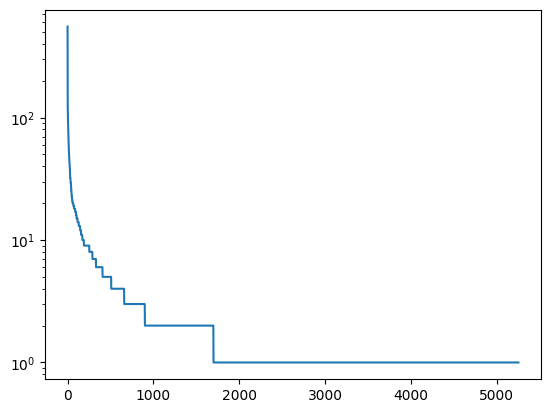

In [47]:
# display word occurrences first for before
plt.figure()
plt.semilogy(-np.sort(-np.sum(Mwd_before,axis=1)))
plt.savefig(out_dir+out_file+"_statistics_before.png")

In [48]:
# remove words that are used once or twice
select_before = (np.sum(Mwd_before,axis=1)>2)
Mwd_before = Mwd_before[select_before,:]
words_before = words_before[select_before]
# remove documents that do not contain words
select_before = (np.sum(Mwd_before,axis=0)>0)
Mwd_before = Mwd_before[:,select_before]
documents_before = documents_before[select_before]
# display final matrix size
display(Mwd_before.shape)

(900, 1389)

In [49]:
# store the result
pickle.dump([Mwd_before,words_before,documents_before], open(out_dir+out_file+"_before_occurrences.p", "wb"))
# c,d,e = pickle.load(open(out_dir+out_file+"_occurrences.p","rb"))

In [50]:
import pandas as pd
import numpy as np
import scipy
import scipy.sparse as sps
import matplotlib.pyplot as plt
!pip install louvain
import louvain
import igraph as ig
import time
import pickle

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 8.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 17.2 MB/s eta 0:00:00


<ipython-input-50-a3a286e981b8>:7: DeprecationWarning: This package has been superseded by the `leidenalg` package and will no longer be maintained. Please upgrade to the `leidenalg` package.
  import louvain


In [51]:
!pip install bertopic
from bertopic import BERTopic

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.1/154.1 kB 4.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.2/5.2 MB 23.8 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 90.9/90.9 kB 9.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 132.8/132.8 kB 11.3 MB/s eta 0:00:00
  Using cached Cython-0.29.37-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.manylinux_2_24_x86_64.whl (1.9 MB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.8/55.8 kB 6.5 MB/s eta 0:00:00
  Created wheel for hdbscan: filename=hdbscan-0.8.33-cp310-cp310-linux_x86_64.whl size=3039295 sha256=39f5db0055d4840e8f1331f3fd9b44ba60a47698c3bf02e964d274ff9db8e12f
  Stored in directory: /root/.cache/pip/wheels/75/0b/3b/dc4f60b7cc455efaefb62883a7483e76f09d06ca81cf87d610
  Created wheel for umap-l

# **Loading functions for probability matrices**

In [52]:
%run "/content/drive/MyDrive/NetworkScience_Project/Tiktok/communities_mod.ipynb"

bertopic 1.11
softlouvain v1.10


# **Load Tiktok data**

In [54]:
in_dir = "/content/drive/MyDrive/NetworkScience_Project/Tiktok/"
in_file = "tiktok_feminism_barbie_before"

# load word occurrences
Mwd, words, documents = pickle.load(open(in_dir+in_file+"_occurrences.p","rb"))
Mwd = sps.csr_matrix(Mwd)

# **Visualize the degree distribution of words and documents**

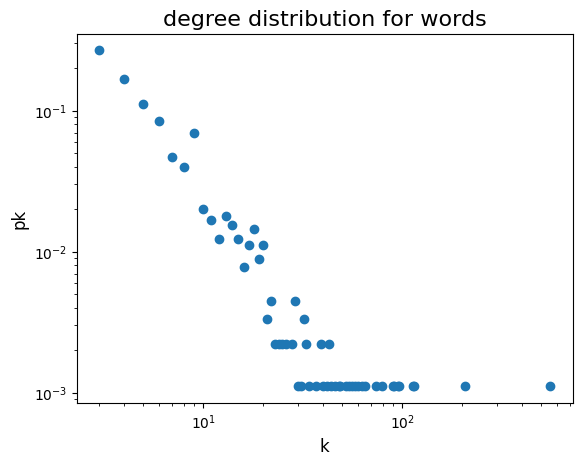

In [55]:
# degree distribution for words
dw = np.squeeze(np.asarray(Mwd.sum(axis=1))) # words degrees
k = np.unique(dw)
pk = np.histogram(dw,np.append(k,k[-1]+1))[0]
pk = pk/pk.sum()
Pk = 1-np.cumsum(pk)
fig = plt.figure()
plt.loglog(k,pk,'o')
plt.title("degree distribution for words", size=16)
plt.xlabel("k", size=12)
plt.ylabel("pk", size=12)
plt.show()

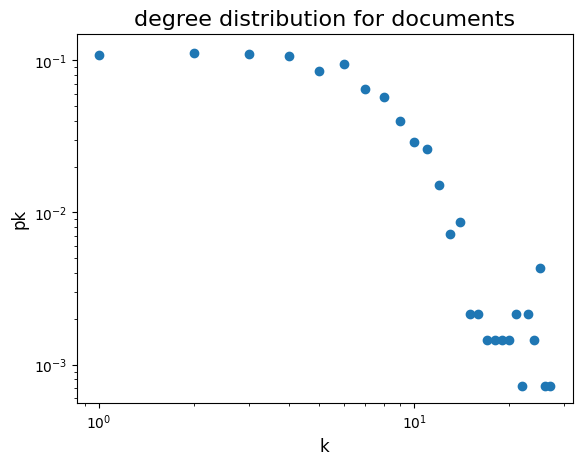

In [56]:
# degree distribution for documents
dd = np.squeeze(np.asarray(Mwd.sum(axis=0))) # documents degrees
k = np.unique(dd)
pk = np.histogram(dd,np.append(k,k[-1]+1))[0]
pk = pk/pk.sum()
Pk = 1-np.cumsum(pk)
fig = plt.figure()
plt.loglog(pk,'o')
plt.title("degree distribution for documents", size=16)
plt.xlabel("k", size=12)
plt.ylabel("pk", size=12)
plt.show()

# **Build probability matrices from words occurrences**

In [58]:
# remove elements that are too central
# remove documents and words with fewer than 2 links
Mwd, words, documents = clean_Mwd_matrix(Mwd,words,documents)

removing:  


In [59]:
# build probability matrices
# set tform=True for TF-IDF matrices
Pwd, Pww, Pdd, Paa = probability_matrices(Mwd, tform=False)

# **Assign documents to topics using Louvain**
i.e., run Louvain community detection on Pdd

In [60]:
# start a time counter
tic = time.time()

# build a graph based on Pdd as adjacency matrix
A = sps.csr_matrix(Pdd)
G = ig.Graph.Adjacency((A > 0).toarray().tolist())
G.es['weight'] = np.array(A[A.nonzero()])[0]

# run Louvain on the graph to get a partition
part = louvain.find_partition(G, louvain.ModularityVertexPartition,
                                 weights='weight')

# function to map the partition into a community assignment matrix C
# where rows represent documents, and columns represent topic*s
def partition_to_C(part):
  C = sps.csr_matrix((Pdd.shape[0],len(part)))
  for i in range(len(part)):
    C[np.array(part[i]),i] = 1
  return C

# map the partition into a community assignment matrix C
C_l = partition_to_C(part)

# capture execution time
et_louv = time.time()-tic

# refine with soft Louvain
C_sl, _, _ = my_soft_louvain(Pdd, C_l)

# capture execution time
et_slouv = time.time()-tic

/usr/local/lib/python3.10/dist-packages/scipy/sparse/_index.py:143: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_arrayXarray(i, j, x)


[1197, 1197]
108.89444430272819
26.870057685088817
22.62741699796953
12.727922061357859
0.0
[1197, 17]
4.242640687119286
0.0
[1197, 16]
0.0


# **Assign documents to topics using BERTopic**
i.e., run BERTopic detection on superficially cleaned text

In [61]:
# load text
df2 = pd.read_excel(in_dir+in_file+"_cleaned.xlsx")
df2["user"] = np.array([str(i) for i in df2["user"]])
# remove those documents that do not appear in Pcc
documents = np.array([str(i) for i in documents])
df2 = df2.loc[df2['user'].isin(documents)]
dropping_number = df2["user"].shape[0] - len(documents)
df2.drop(df2.tail(dropping_number).index, inplace=True)
df2.index = np.array(range(len(df2)))

# workaround to reinsert hashtags (if any) in the cleaned text
df2["text_deep_clean2"] = [str(df2["text_deep_clean"][i]) + " #" +
                           df2["hashtags"][i][2:-2].replace("', '"," #")
                           for i in range(len(df2))]

In [62]:
# start a time counter
tic = time.time()

# prepare a BERTopic instance
bert_model = BERTopic()

# run BERTopic
docs = list(df2["title"])
topics, probabilities = bert_model.fit_transform(docs)

# reduce the number of topics only in case it is needed!
# topics = bert_model.reduce_outliers(docs, topics)

# function to map the topis into a community assignment matrix C
# where rows represent documents, and columns represent topics
def topics_to_C(topics):
  # extract community assignments
  C = sps.csr_matrix((len(topics),max(topics)+2))
  for i in range(C.shape[1]):
    C[np.array(topics)==(i-1),i] = 1
  # remove zero assignments
  C = C[:,np.unique(scipy.sparse.find(C)[1])]
  return C

# map the topics into a community assignment matrix C
C_b = topics_to_C(topics)

# capture execution time
et_bert = time.time()-tic

modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.6k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/scipy/sparse/_index.py:143: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_arrayXarray(i, j, x)


# **Evaluate NMI, modulartity, Ncut, and Infomap metrics**

In [63]:
# prepare a template dataframe for collecting the results
df = pd.DataFrame(data={'data':[],'algo':[],'time':[],'c#':[],
                        'NMI':[],'Q':[],'Ncut':[],'InfoMap':[]})

# identify the infomap ranking vector
r = infomap_rank(Pdd)

In [64]:
# hard Louvain: evaluate the statistics of interest
stats = clustering_statistics(C_l,Pwd,Pdd,r)
# store them into the dataframe
df.loc[len(df)] = [in_file,"hard Louvain Pdd",et_louv,C_l.shape[1]] + stats

# soft Louvain: evaluate the statistics of interest
stats = clustering_statistics(C_sl,Pwd,Pdd,r)
# store them into the dataframe
df.loc[len(df)] = [in_file,"soft Louvain Pdd",et_slouv,C_sl.shape[1]] + stats

# BERTopic: evaluate the statistics of interest
stats = clustering_statistics(C_b,Pwd,Pdd,r)
# store them into the dataframe
df.loc[len(df)] = [in_file,"BERTopic",et_bert,C_b.shape[1]] + stats

/usr/local/lib/python3.10/dist-packages/scipy/sparse/_index.py:100: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
/usr/local/lib/python3.10/dist-packages/scipy/sparse/_index.py:100: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])


In [65]:
# display the result
display(df.head(3))

,data,algo,time,c#,NMI,Q,Ncut,InfoMap
0,tiktok_feminism_barbie_before,hard Louvain Pdd,0.830435,17,0.646029,0.477582,0.396392,-0.043563
1,tiktok_feminism_barbie_before,soft Louvain Pdd,9.467553,16,0.647721,0.478913,0.386120,-0.043196
2,tiktok_feminism_barbie_before,BERTopic,90.681296,24,0.443533,0.195853,0.764405,0.061184


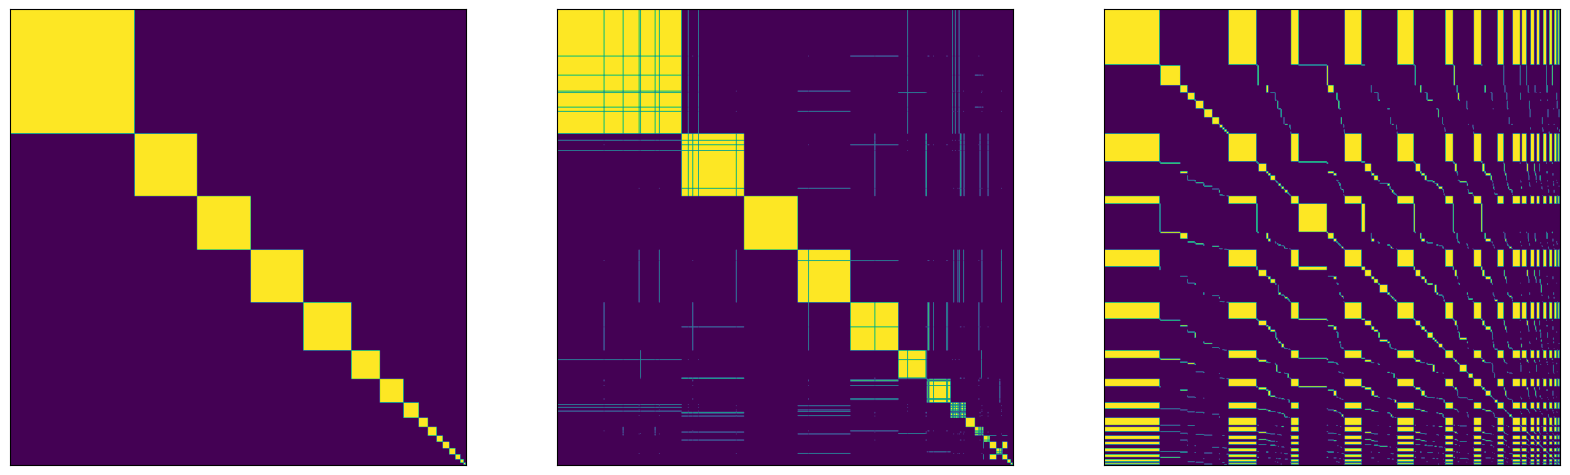

In [66]:
# show community patterns and their relations
plot_community_patterns([C_l,C_sl,C_b],nrows=1,ncols=3,refs=[0,2])

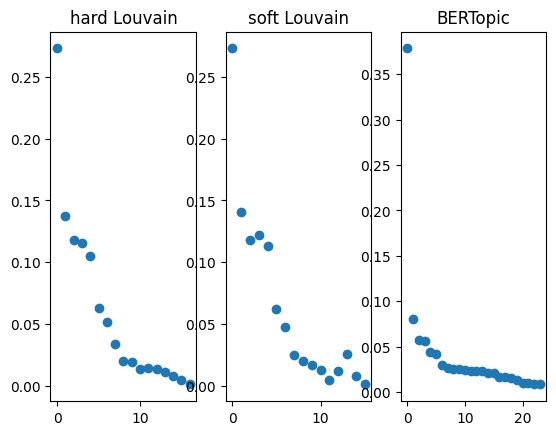

In [67]:
# show number of documents per community
fig, (ax1, ax2, ax3) = plt.subplots(1, 3)
ax1.plot(np.array(C_l.sum(axis=0))[0]/C_l.sum(),'o')
ax1.set_title('hard Louvain')
ax2.plot(np.array(C_sl.sum(axis=0))[0]/C_sl.sum(),'o')
ax2.set_title('soft Louvain')
ax3.plot(np.array(C_b.sum(axis=0))[0]/C_b.sum(),'o')
ax3.set_title('BERTopic');

# **Visualize the result using BERTopic tools**

In [68]:
# Louvain first

# use the clean text in order to get a more meaningful description
docs = list(df2["text_deep_clean2"])
bert_model1 = bertopic_overwrite(bert_model,docs,C_l)

# visualize topic description
bert_model1.visualize_barchart(topics = range(C_l.shape[1]),
                               n_words = 8,
                               title = "Louvain results")

In [69]:
# BERTopic second

# use the clean text in order to get a more meaningful description
docs = list(df2["text_deep_clean2"])
bert_model2 = bertopic_overwrite(bert_model,docs,C_b)

# visualize topic description
bert_model2.visualize_barchart(topics = range(C_b.shape[1]),
                               n_words = 8,
                               title = "BERTopic results")

In [70]:
topics = bert_model1.get_topics()
print(topics)

{0: [('feminism', 0.06067371987110598), ('fyp', 0.04830300536504595), ('feminist', 0.029959876946617888), ('nan', 0.027322860532306585), ('foryou', 0.026002554107019713), ('women', 0.024848428444953607), ('foryoupage', 0.01939393619511338), ('viral', 0.018338577450888134), ('stitch', 0.015638690199063908), ('woman', 0.015369119131444944)], 1: [('man', 0.04835348911684456), ('think', 0.036194420059108466), ('woman', 0.03024576368115309), ('point', 0.02792315229988691), ('want', 0.0265203251318803), ('time', 0.025628101158731997), ('nice', 0.023927803316934875), ('equal', 0.021923232358496487), ('good', 0.02157423189721797), ('literally', 0.021146700591364278)], 2: [('que', 0.053554832898905363), ('je', 0.04826930004754811), ('pas', 0.04107892347174338), ('feministe', 0.04066694284548634), ('de', 0.037166645045863055), ('et', 0.037131883798094845), ('etre', 0.037010143407316606), ('la', 0.031013164499406824), ('mais', 0.028696095187768358), ('elle', 0.026087359261607598)], 3: [('taylor',

In [71]:
topics = bert_model1.get_topics()
new_df = pd.DataFrame.from_dict(topics, orient='index')

ktopics = []

for topic_list in range(0, new_df.shape[1]):
  for topic in range(0, new_df.shape[0]):
      ktopics.append(new_df[topic_list][topic][0])

unique_ktopics  = set(ktopics)
topics_ktopics = list(unique_ktopics)

In [73]:
# Load the CSV file
df = pd.read_excel("/content/drive/MyDrive/NetworkScience_Project/Tiktok/tiktok_feminism_barbie_before_cleaned.xlsx")

# Extract all keywords from the BERT model's output
keywords = topics_ktopics
df["hashtags_2"] = None
for i in range(len(df["text_deep_clean"])):
  if isinstance(df["text_deep_clean"][i], str):  # Check if text is a string
    hashtags2 = []

    for word in df["text_deep_clean"][i].split():

      if word in keywords:
        #  print(type(word))
          hashtags2.append(str(word))
          df["hashtags_2"][i] = hashtags2


In [74]:
df.to_pickle('/content/drive/MyDrive/NetworkScience_Project/Tiktok/tiktok_feminism_barbie_before_hashtag.pkl')

In [75]:
df.head()

,Unnamed: 0,create_time,user,title,text_sup_clean,text_deep_clean,text_deep_clean_pos,hashtags,hashtags_2
0,0,2021-11-19,FalseMarias,Is intersectional feminism a branch into itsel...,is intersectional feminism a branch into itsel...,intersectional feminism branch method pursue b...,"['intersectional ADJ', 'feminism NOUN', 'branc...",[],"[feminism, branch, branch, feminism]"
1,1,2021-11-20,ryan🖤🇵🇸,nahh u gotta be smart af to be able to make su...,nahh you got to be smart af to be able to make...,nahh smart af able depth analysis min,"['nahh PROPN', 'get VERB', 'smart ADJ', 'af AD...",[],[smart]
2,2,2021-11-19,Lauren,My fave book on the branches is Feminist Thoug...,my fave book on the branches is feminist thoug...,fave book branch feminist think rosemarie tong...,"['fave ADJ', 'book NOUN', 'branch NOUN', 'femi...",[],"[branch, feminist, think]"
3,3,2021-11-19,?,would u say radfem isn’t intersectional then? ...,would you say radfem is not intersectional the...,radfem intersectional acc nuance man color cla...,"['say VERB', 'radfem NOUN', 'intersectional AD...",[],"[man, man]"
4,4,2021-11-19,sage :D,the false dichotomy between libfem and radfem ...,the false dichotomy between libfem and radfem ...,false dichotomy libfem radfem dangerous,"['false ADJ', 'dichotomy NOUN', 'libfem PROPN'...",[],None


In [77]:
comments_df = pd.read_pickle("/content/drive/MyDrive/NetworkScience_Project/Tiktok/tiktok_feminism_barbie_before_hashtag.pkl")
comments_df.head()

,Unnamed: 0,create_time,user,title,text_sup_clean,text_deep_clean,text_deep_clean_pos,hashtags,hashtags_2
0,0,2021-11-19,FalseMarias,Is intersectional feminism a branch into itsel...,is intersectional feminism a branch into itsel...,intersectional feminism branch method pursue b...,"['intersectional ADJ', 'feminism NOUN', 'branc...",[],"[feminism, branch, branch, feminism]"
1,1,2021-11-20,ryan🖤🇵🇸,nahh u gotta be smart af to be able to make su...,nahh you got to be smart af to be able to make...,nahh smart af able depth analysis min,"['nahh PROPN', 'get VERB', 'smart ADJ', 'af AD...",[],[smart]
2,2,2021-11-19,Lauren,My fave book on the branches is Feminist Thoug...,my fave book on the branches is feminist thoug...,fave book branch feminist think rosemarie tong...,"['fave ADJ', 'book NOUN', 'branch NOUN', 'femi...",[],"[branch, feminist, think]"
3,3,2021-11-19,?,would u say radfem isn’t intersectional then? ...,would you say radfem is not intersectional the...,radfem intersectional acc nuance man color cla...,"['say VERB', 'radfem NOUN', 'intersectional AD...",[],"[man, man]"
4,4,2021-11-19,sage :D,the false dichotomy between libfem and radfem ...,the false dichotomy between libfem and radfem ...,false dichotomy libfem radfem dangerous,"['false ADJ', 'dichotomy NOUN', 'libfem PROPN'...",[],None


In [78]:
comments_filtered = comments_df.copy()
column_list = ["user","create_time", "text_deep_clean", "text_deep_clean_pos", "hashtags_2"]
comments_filtered = comments_filtered[column_list]

In [79]:
comments_filtered

,user,create_time,text_deep_clean,text_deep_clean_pos,hashtags_2
0,FalseMarias,2021-11-19,intersectional feminism branch method pursue b...,"['intersectional ADJ', 'feminism NOUN', 'branc...","[feminism, branch, branch, feminism]"
1,ryan🖤🇵🇸,2021-11-20,nahh smart af able depth analysis min,"['nahh PROPN', 'get VERB', 'smart ADJ', 'af AD...",[smart]
2,Lauren,2021-11-19,fave book branch feminist think rosemarie tong...,"['fave ADJ', 'book NOUN', 'branch NOUN', 'femi...","[branch, feminist, think]"
3,?,2021-11-19,radfem intersectional acc nuance man color cla...,"['say VERB', 'radfem NOUN', 'intersectional AD...","[man, man]"
4,sage :D,2021-11-19,false dichotomy libfem radfem dangerous,"['false ADJ', 'dichotomy NOUN', 'libfem PROPN'...",None
...,...,...,...,...,...
1508,Emma & Floli,2020-09-01,mean sisofficial,"['mean VERB', 'sisofficial ADJ']",None
1509,C&J,2021-11-25,meet collectif nemesis feministe patriote ou pas,"['meet VERB', 'collectif PROPN', 'nemesis NOUN...","[feministe, pas]"
1510,✰ Kairi✰,2022-08-18,mf want wifi password,"['mf PROPN', 'want VERB', 'wifi NOUN', 'passwo...",[want]
1511,mads🎀,2022-05-13,man,"['man NOUN', 'enough ADJ']",[man]


In [83]:
#initialize an empty dict
unique_words = {}
for row in comments_filtered["text_deep_clean"]:
    if pd.notna(row):
        # Split the row into words and iterate over them
        for word in row.split(" "):
            #if the word is encountered for the first time add to dict as key and set its value to 0
            unique_words.setdefault(word,0)
            #increase the value (i.e the count) of the word by 1 every time it is encountered
            unique_words[word] += 1

In [84]:
uw_df = pd.DataFrame.from_dict(unique_words, orient='index').reset_index()
uw_df.rename(columns = {'index':'Word', 0:'Count'}, inplace=True)
uw_df.sort_values(by=['Count'], ascending=False, inplace=True)
uw_df

,Word,Count
25,man,115
88,woman,115
445,que,69
15,think,63
46,love,62
...,...,...
1452,kennt,1
1450,von,1
1449,ist,1
1448,welt,1


In [85]:
unique_hashtags = {}


for idx, row in comments_filtered.iterrows():
  hashtag_list = []
  try:
    for hashtag in row["hashtags_2"]:
      unique_hashtags.setdefault("#"+hashtag, 0)
      unique_hashtags['#'+hashtag] += 1
      hashtag_list.append(hashtag)
  except:
      continue


In [86]:
unique_hashtags

{'#feminism': 44,
 '#branch': 8,
 '#smart': 6,
 '#feminist': 24,
 '#think': 63,
 '#man': 115,
 '#love': 62,
 '#good': 39,
 '#gender': 12,
 '#talk': 21,
 '#people': 60,
 '#regard': 4,
 '#woman': 115,
 '#fall': 7,
 '#want': 43,
 '#thank': 21,
 '#bad': 13,
 '#time': 32,
 '#problem': 13,
 '#country': 15,
 '#speak': 13,
 '#allow': 6,
 '#period': 13,
 '#ambulance': 2,
 '#kind': 10,
 '#fight': 7,
 '#come': 17,
 '#literally': 17,
 '#story': 8,
 '#father': 6,
 '#mom': 7,
 '#dad': 10,
 '#way': 25,
 '#taylor': 31,
 '#swift': 10,
 '#question': 11,
 '#point': 24,
 '#like': 10,
 '#understand': 14,
 '#lot': 17,
 '#equal': 13,
 '#bill': 6,
 '#dude': 8,
 '#right': 30,
 '#nice': 11,
 '#know': 43,
 '#elle': 15,
 '#la': 36,
 '#et': 42,
 '#de': 34,
 '#je': 27,
 '#que': 69,
 '#regardless': 2,
 '#confident': 8,
 '#happy': 9,
 '#let': 18,
 '#girl': 29,
 '#ask': 13,
 '#feministe': 27,
 '#pas': 35,
 '#respect': 10,
 '#mais': 12,
 '#etre': 15,
 '#fashion': 2,
 '#grow': 7,
 '#surname': 5,
 '#happen': 10,
 '#away'

In [87]:
uh_df = pd.DataFrame.from_dict(unique_hashtags, orient='index').reset_index()
uh_df.rename(columns = {'index':'Hashtag', 0:'Count'}, inplace=True)
uh_df.sort_values(by=['Count'], ascending=False, inplace=True)

In [88]:
uh_df

,Hashtag,Count
5,#man,115
12,#woman,115
51,#que,69
4,#think,63
6,#love,62
...,...,...
85,#confidence,1
84,#juga,1
83,#kakak,1
75,#queer,1


## Building the network

We are going to use the networkx library, which is a Python library that enables network science analysis of the data.

We are going to use it to create our network and extract edgelist from it, since we can easily import it to Gephi (a software we are going to see in visualization labs).

However, it offers implemented algorithms for analysis (for example PageRank) that you can use out-of-box to analyze your network.

In [89]:
import itertools
import networkx as nx

In [91]:
unique_hashtags

{'#feminism': 44,
 '#branch': 8,
 '#smart': 6,
 '#feminist': 24,
 '#think': 63,
 '#man': 115,
 '#love': 62,
 '#good': 39,
 '#gender': 12,
 '#talk': 21,
 '#people': 60,
 '#regard': 4,
 '#woman': 115,
 '#fall': 7,
 '#want': 43,
 '#thank': 21,
 '#bad': 13,
 '#time': 32,
 '#problem': 13,
 '#country': 15,
 '#speak': 13,
 '#allow': 6,
 '#period': 13,
 '#ambulance': 2,
 '#kind': 10,
 '#fight': 7,
 '#come': 17,
 '#literally': 17,
 '#story': 8,
 '#father': 6,
 '#mom': 7,
 '#dad': 10,
 '#way': 25,
 '#taylor': 31,
 '#swift': 10,
 '#question': 11,
 '#point': 24,
 '#like': 10,
 '#understand': 14,
 '#lot': 17,
 '#equal': 13,
 '#bill': 6,
 '#dude': 8,
 '#right': 30,
 '#nice': 11,
 '#know': 43,
 '#elle': 15,
 '#la': 36,
 '#et': 42,
 '#de': 34,
 '#je': 27,
 '#que': 69,
 '#regardless': 2,
 '#confident': 8,
 '#happy': 9,
 '#let': 18,
 '#girl': 29,
 '#ask': 13,
 '#feministe': 27,
 '#pas': 35,
 '#respect': 10,
 '#mais': 12,
 '#etre': 15,
 '#fashion': 2,
 '#grow': 7,
 '#surname': 5,
 '#happen': 10,
 '#away'

In [92]:
uh = unique_hashtags.keys()
uw = unique_words.keys()

In [93]:
import numpy as np
network = {}
for index, row in comments_filtered.iterrows():
    combined_list = row['hashtags_2']  # Use keys() to get the list of unique subreddits
    if isinstance(combined_list, list):
      for pair in itertools.product(combined_list, combined_list):
          if pair[0] != pair[1] and not (pair[::-1] in network):
              #breakpoint()
              network.setdefault(pair, 0)
              # Update the weight based on actual occurrences
              network[pair] += 1

network_df = pd.DataFrame.from_dict(network, orient="index")

network

{('feminism', 'branch'): 7,
 ('branch', 'feminist'): 3,
 ('branch', 'think'): 2,
 ('feminist', 'think'): 5,
 ('love', 'feminist'): 4,
 ('love', 'think'): 8,
 ('good', 'gender'): 2,
 ('talk', 'feminism'): 2,
 ('talk', 'people'): 3,
 ('feminism', 'people'): 1,
 ('good', 'feminist'): 6,
 ('think', 'feminism'): 2,
 ('regard', 'woman'): 3,
 ('regard', 'branch'): 1,
 ('regard', 'feminism'): 3,
 ('feminism', 'feminist'): 1,
 ('want', 'good'): 4,
 ('want', 'feminist'): 5,
 ('want', 'branch'): 1,
 ('good', 'branch'): 1,
 ('think', 'thank'): 1,
 ('bad', 'time'): 1,
 ('problem', 'people'): 4,
 ('country', 'bad'): 4,
 ('country', 'problem'): 4,
 ('bad', 'problem'): 2,
 ('thank', 'speak'): 1,
 ('people', 'allow'): 1,
 ('allow', 'problem'): 2,
 ('ambulance', 'think'): 2,
 ('ambulance', 'people'): 2,
 ('ambulance', 'country'): 2,
 ('think', 'people'): 9,
 ('think', 'country'): 1,
 ('people', 'country'): 2,
 ('think', 'problem'): 1,
 ('think', 'kind'): 1,
 ('think', 'woman'): 13,
 ('people', 'kind'): 

In [94]:
network_df.reset_index(inplace=True)
network_df.columns = ["pair","weight"]
network_df.sort_values(by="weight",inplace=True, ascending=False)
network_df

,pair,weight
139,"(et, que)",145
186,"(et, pas)",141
196,"(que, pas)",130
132,"(la, et)",105
227,"(que, la)",94
...,...,...
367,"(point, man)",1
368,"(point, lot)",1
369,"(way, love)",1
370,"(way, lot)",1


In [95]:
#to get weighted graph we need a list of 3-element tuplels (u,v,w) where u and v are nodes and w is a number representing weight
up_weighted = []
for edge in network:
    #we can filter edges by weight by uncommenting the next line and setting desired weight threshold
    #if(network[edge])>1:
    up_weighted.append((edge[0],edge[1],network[edge]))

G = nx.Graph()
G.add_weighted_edges_from(up_weighted)

In [96]:
print(len(G.nodes()))
print(len(G.edges()))

108
543


In [97]:
filename = "/content/drive/MyDrive/NetworkScience_Project/Tiktok/tiktok_edgelist_feminism_before_released.csv"

In [98]:
nx.write_weighted_edgelist(G, filename, delimiter=",")

In [99]:
word_nodes = pd.DataFrame.from_dict(unique_words,orient="index")
word_nodes.reset_index(inplace=True)
word_nodes["Label"] = word_nodes["index"]
word_nodes.rename(columns={"index":"Id",0:"delete"},inplace=True)
word_nodes = word_nodes.drop(columns=['delete'])

word_nodes

,Id,Label
0,intersectional,intersectional
1,feminism,feminism
2,branch,branch
3,method,method
4,pursue,pursue
...,...,...
2897,patriote,patriote
2898,mf,mf
2899,wifi,wifi
2900,password,password


In [100]:
hashtag_nodes = uh_df.copy()
hashtag_nodes["Label"] = hashtag_nodes["Hashtag"]
hashtag_nodes.rename(columns={"Hashtag":"Id"},inplace=True)
hashtag_nodes = hashtag_nodes.drop(columns=['Count'])
hashtag_nodes

,Id,Label
5,#man,#man
12,#woman,#woman
51,#que,#que
4,#think,#think
6,#love,#love
...,...,...
85,#confidence,#confidence
84,#juga,#juga
83,#kakak,#kakak
75,#queer,#queer


In [101]:
nodelist = hashtag_nodes
nodelist.to_csv("/content/drive/MyDrive/NetworkScience_Project/Tiktok/tiktok_nodelist_feminism_before_released.csv",index=False)

In [102]:
a = pd.read_csv("/content/drive/MyDrive/NetworkScience_Project/Tiktok/tiktok_edgelist_feminism_before_released.csv")
a

,feminism,branch,7
0,feminism,talk,2
1,feminism,people,1
2,feminism,think,2
3,feminism,regard,3
4,feminism,feminist,1
...,...,...,...
537,wanita,tidak,8
538,snake,venomous,1
539,co,liberation,1
540,co,bust,1


In [103]:
a.columns = ['Source','Target','Label']

In [104]:
a

,Source,Target,Label
0,feminism,talk,2
1,feminism,people,1
2,feminism,think,2
3,feminism,regard,3
4,feminism,feminist,1
...,...,...,...
537,wanita,tidak,8
538,snake,venomous,1
539,co,liberation,1
540,co,bust,1


In [105]:
a.to_csv("/content/drive/MyDrive/NetworkScience_Project/Tiktok/tiktok_edgelist_feminism_before_released.csv",index=False)